
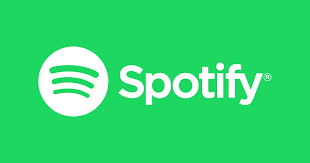

# Introduction

Have you ever wondered how music differs from country to country? 
<br>
Do the most played songs within a country share some common attributes?
<br>
What characteristics do the most listened songs world-wide share?
<br>
If you answered yes to any of these questions keep reading because we are about to find out!
<br>

### Music's impact
Music is found in every culture, varying widely times and places. A culture's music is influenced by all other aspects of that culture, including social and economic organization and experience, climate, access to technology and emotions; so we can conclude that music is a way of expression of each culture, time and place specific.
<br> 
As we have created these world-wide music streaming platforms, how have these tools impacted the music we listen to nowadays?<br>
Has music become more universal? Are there similar trends impacting the global landscape?<br>

To try to answer these questions we are going to use data of *Spotify*, which is the world's largest music streaming platform by number of subscribers. We will be looking for differences or similarities on audio features across the most played songs in the countries in which Spotify is available.<br>
We are using the Top 50 playlists, that Spotify actualizes daily, as a *proxy* of the music people in a country listen to.<br>

### Validity concerns
I just want to highlight some of the validity concerns of this approach:<br>
self-selection bias: this Top 50 playlists may not be statistically representative of the music people in a country listen to, since maybe just a small part of the population with similar characteristics have access to this streaming service.



### Tutorial Content

For this tutorial we are going to use **Spotipy**.
**Spotipy** is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
We are going to analyze the Top 50 playlists of each of the countries in which Spotify is available. A full list of the countries in which Spotify is available can be found in the link in the References section.



### Installing the libraries

First, let's install the libraries.
Install Spotipy with:
<br>
`pip install spotipy`
<br>
Install plotly for data visualization with:
<br>
`pip install plotly`  
<br>
Then import the libraries:


In [3]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials #To access authorized Spotify data
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px #library used to visualize data

### Spotipy library

Spotipy library allows you to retrieve data in an easy way from the Spotify server. We could classify the available functions of the library as follows:
1. *Functions to make requests*: authorizes you to pass your credentials to make requests to the server.
<br>

2. *Descriptive functions*: get information like name from an artist, track, album or playlist, when the input is an id.Or get information about a current user.<br>
Example:<br>
album(album_id)<br>
    returns a single album given the album’s ID, URIs or URL<br>
    Parameters:<br>
    album_id - the album ID, URI or URL<br>
   <br> 
3. *Audio Analysis functions*: retrieves information that can help you do audio analysis.<br>
Example:<br>
audio_features(tracks=[])<br>
    Get audio features for one or multiple tracks based upon their Spotify IDs Parameters:<br>
    Parameters:<br>
    tracks - a list of track URIs, URLs or IDs, maximum: 50 ids<br>
We are using this function for the Example application.
<br>
    
4. *Recommendation functions*: get a recommended list of songs based on a music genre, country or artist. Also get recommendations of new releases.
Example:<br>
    recommendations(seed_artists=None, seed_genres=None, seed_tracks=None, limit=20, country=None, **kwargs)
    <br>

5. *Create functions*: allows you to create playlists for a user, add or delete tracks to a specific playlist.
<br>Example:<br>
    user_playlist_create(user, name, public=True, description='')<br>
    Creates a playlist for a user
<br>
Let's get started!

### Authorized requests
Spotipy allows you to access data from Spotify from either Authorized or Unauthorized requests. It's recommended to pass all the requests as authorized requests as there are more avialable functions and it also allows you to request more data.<br>
To make requests to the API you have to follow these steps: 
1. Have a Spotify user.
2. Register an application on the Developer Dashboard to get your credentials. https://developer.spotify.com/dashboard/login
3. Make authorized requests by either of these two methods: Authorization Code Flow and Client Credentials Flow. In this tutorial we are going to work with the last method.



**Client Credentials Flow**
<br>
Create a Spotify object to access the API
<br>
Here we first define a function to create the object, which we'll use later on.

In [4]:
def sp_object(client_id, client_secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)#pass credentials
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)#create object
    
    return sp


In [191]:
client_id= "2582c4f549094459983e6b5589624886" #your credentials that you get when registering you application.
client_secret= "d59b6141e9b441159ed10cba27abb068"
sp = sp_object(client_id, client_secret) #create spotify object to make requests using function we defined

For the purpose of this tutorial I created a cvs file with all the countries in which Spotify is available and its corresponding TOP 50 Playlist *uri* which I extracted from the Spotify Website. I also added some extra information like what continent and subregion they belong to and the year in which Spotify was launched in each country, which can be used for further analysis.

In [179]:
import pandas as pd
df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')  #load dataframe

Let's visualize it:

In [178]:
import plotly.express as px
an = pd.read_csv (r'df_animation.csv')
fig = px.choropleth(an, locations="iso_alpha", color="number_years",
                     hover_name="continent", color_continuous_scale=px.colors.sequential.Viridis,
                     projection="natural earth")
fig.show(renderer="notebook_connected")#use this renderer to visualize in nbviewer



## Example application
Make a musical analysis of the most played songs of a country and visualize this data comparing countries.<br> 
The musical analysis we are going to perform will be based on the audio features of the most played songs of a country. To get the most played songs of a country we are going to use as a *proxy* **Spotify Top 50 playlists** per country, which are uploaded daily based on the most streamed songs on a particular location. <br>
The way Spotify generates these playlists is heavily influenced by Global Trends so we don't expect to see a lot of variation from country to country.<br>

#### Pipeline
**Extract the data**<br>
Desired ouput: a dataframe for Top 50 Playlist of a country that includes the audio features of each track.<br>
1. Define a function that returns a list of the tracks on a Top 50 playlist of a country. This for the purpose of extracting the data from Spotify's server.
2. Define a function that returns the *uri* for each track on a Top 50 playlist of a country. We do this because if we want to get the audio features of a playlist, the input has to be an uri. 
3. Define a function that generates a dictionary of the audio features for each of the tracks in a Top 50 playlist of a country.
4. Define a function that generates a dataframe with these audio features per track.<br>
5. Make an automated function where the input is the name of the country and the output is the data frame with the audio features per track.<br>

**Analyze the data and Visualize the data**
<br>
For this purpose we are using the following library: plotly<br>

#### Notes:
If we wanted to analyze the audio features of other playlists this would be the process we would have to follow.

### Step 1
To return a list of tracks of a Top50 playlist of a country I used the Spotipy function user_playlist_tracks. The parameters for this function are:
<br>
user - the id of the user. In our case Spotify.<br>
playlist_id - the id of the playlist. Provided by the dataframe I created.<br>
fields - which fields to return<br>
limit - the maximum number of tracks to return<br>
offset - the index of the first track to return<br>
market - an ISO 3166-1 alpha-2 country code.,<br>
defined the following function. <br>
Then, I defined my own function in which if you enter the name of a country in which Spotify is avaialable, you'll get the list of the tracks of that Top 50 playlist.
*The first letter of the name of the country has to be capitalized.*

In [7]:
def top50playlist_tracks(country):
    import pandas as pd
    df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')
    top50_uri = list(df['URI'])
    countries = list(df['country_name'])
    countries_uri = dict(zip(countries, top50_uri))
    tracks = sp.user_playlist_tracks('spotify', playlist_id= countries_uri[country], fields=None, limit=100, offset=0, market=None)
    return tracks

### Step 2
Define a function that returns the URI for each track on a TOP50 playlist of a country.

In [8]:
def uri_tracks_top50_country(country):
    tracks = top50playlist_tracks(country)
    uri_tracks = []
    name_tracks = []
    for i in range(len(tracks['items'])):
        uri = tracks['items'][i]['track']['uri']
        name = tracks['items'][i]['track']['name']
        uri_tracks.append(uri)
        name_tracks.append(name)
    
    dict_uri = dict(zip(name_tracks, uri_tracks))
        
    return dict_uri, uri_tracks, name_tracks

### Step 3
In the following function we are creating a dictionary for all the music features that we are interested in analyzing. For a more complete explanation of what these characteristics mean go to the Glossary section. 

In [9]:
def features_tracks(country):
    uri_tracks_top = uri_tracks_top50_country(country)[1]
    name_tracks = uri_tracks_top50_country(country)[2]
    features = sp.audio_features(list(uri_tracks_top)) #here we are using this function to get the audio features.
    
    ft_danceability = []   #we are creating lists of the values of the audio features we want to analyze for each track
    ft_energy = []
    ft_key = []
    ft_loudness = []
    ft_mode = []
    ft_speechiness = []
    ft_acousticness = []
    ft_instrumentalness = []
    ft_liveness = []
    ft_valence = []
    ft_tempo = []
    for i in range(len(features)):
        danceability = features[i]['danceability']
        energy = features[i]['energy']
        key = features[i]['key']
        loudness = features[i]['loudness']
        mode = features[i]['mode']
        speechiness = features[i]['speechiness']
        acousticness = features[i]['acousticness']
        instrumentalness = features[i]['instrumentalness']
        liveness = features[i]['liveness']
        valence = features[i]['valence']
        tempo = features[i]['tempo']
        ft_danceability.append(danceability)
        ft_energy.append(energy)
        ft_key.append(key)
        ft_loudness.append(loudness)
        ft_mode.append(mode)
        ft_speechiness.append(speechiness)
        ft_acousticness.append(acousticness)
        ft_instrumentalness.append(instrumentalness)
        ft_liveness.append(liveness)
        ft_valence.append(valence)
        ft_tempo.append(tempo)
        
        data = {'track_name': name_tracks, #then we genetare a dictionary of the previous values corresponding to 
        'uri': uri_tracks_top,               #its respective audio feature
        'danceability': ft_danceability,
        'energy' : ft_energy,
        'key' :ft_key,
        'loudness': ft_loudness,
        'mode': ft_mode,
        'speechiness' : ft_speechiness,
        'acousticness':ft_acousticness,
        'instrumentalness': ft_instrumentalness,
        'liveness': ft_liveness,
        'valence': ft_valence,
        'tempo' : ft_tempo 
        }
        
       
        
    return data

### Step 4
In this function we generate a dataframe using the dictionary generated in the previous function.

In [10]:
def df_audioft(data):
    import pandas as pd 
    audio_df = pd.DataFrame(data)
    
    return audio_df

### Step 5
To make a more automated process we can use the two previously created functions to generate a dataframe with the audio characteristics per track of the Top 50 playlist of a determined country.
The input is the country you want to analyze and the output will be the dataframe with the audio characteristics of the Top 50 Playlist.

In [11]:
def df_fin(country):
    data = features_tracks(country)
    audio_df = df_audioft(data)
    return audio_df
    

### Use the function we just created
Now we can start creating a dataframe for the music features for each country.
For the scope of this tutorial I'm going to choose the following countries: Mexico, Colombia, United States,Egypt,Taiwan, Turkey and Spain.

In [69]:
df_glob = df_fin('Global')
df_mx = df_fin('Mexico')
df_co = df_fin('Colombia')
df_us = df_fin('United States')
df_eg = df_fin('Egypt')
df_tw = df_fin('Taiwan')
df_sp = df_fin('Spain')
df_tk = df_fin('Turkey')
df_in = df_fin('India')

### Analysis and visualization
Let's visualize the data! <br>
**Danceability**<br>
Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 

In [70]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
x_data = ['Global','Mexico','Colombia','United States', 'Turkey', 'India', 'Taiwan', 'Egypt'] #to display names in the x axis

y0 = np.array(df_global['danceability'])
y1 = np.array(df_mx['danceability'])
y2 = np.array(df_co['danceability'])
y3 = np.array(df_us['danceability'])
y4 = np.array(df_tk['danceability'])
y5 = np.array(df_in['danceability'])
y6 = np.array(df_tw['danceability'])
y7 = np.array(df_eg['danceability'])

y_data = [y0, y1, y2, y3, y4, y5, y6, y7]
colors = ['rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)', 
          'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(127, 96, 0, 0.5)',
        'rgba(200, 124, 80, 0.5)', 'rgba(150, 170, 220, 0.5)', 'rgba(70, 170, 220, 0.5)',
         'rgba(100, 170, 220, 0.5)'] #make color selection of the boxes

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )
fig.update_layout(
    title='Danceability')

fig.show(renderer="notebook_connected") #when visualizing data in Nbviewer it is important to choose the rendered accordingly.


With this preliminary analysis on the audio feature of 'danceability' we can see that the countries with the 'most danceable' songs on average are Spain, Mexico and Colombia.  Between Mexico and Colombia there are a lot of common songs. Also, their distributions have less degree of variation, than other countries like the United States for example.<br>
Now let's take a closer look at the audio features per country.

To visualize the audio features per country Top 50 playlist, we are using a graph called Polar. This will allow us to see characteristics that are stronger on average in a playlist. The audio features that I chose for this analysis are: danceability, speechiness, acousticness, liveness, valence and energy.All these features are measured in a countinuous scale that go from 0 to 1(inclusive), where 1 is the highest value.
<br> I left out tempo, key, loudness and mode from this visualization, mainly because these characteristics are measured in a different scale and some of them are also contained within some of the characteristics that we are already analyzing. For example, danceability already accounts for tempo and loudness, while valence accounts for key and mode.

In [14]:
def get_means(country):
    df = df_fin(country)
    d = df.mean()['danceability']
    s =df.mean()['speechiness']
    a = df.mean()['acousticness']
    i = df.mean()['instrumentalness']
    l = df.mean()['liveness']
    v = df.mean()['valence']
    e = df.mean()['energy']
    r = [d, s, a, i, l ,v, e]
    return r

We defines the previous function so we can get a list of the averages of the features, which we'll use for visualizing the data.

In [15]:
def audio_polar(country):
    import plotly.graph_objects as go

    fig = go.Figure(data=go.Scatterpolar(
      r= get_means(country), #'r' is a list of values you want to analyze, in this case means of the audio features
      theta=['danceability','speechiness','acousticness', 'instrumentalness',
               'liveness', 'valence', 'energy'], #the audio features each value in'r' corresponds to
      fill='toself', fillcolor= 'rgba(93, 164, 214, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)')
    ))

    fig.update_layout(
      polar=dict(
       radialaxis=dict(
          visible=True,
           range=[0, 1]
        ),
      ),
      showlegend=False
    )

    return fig.show(renderer="notebook_connected") #again dont forget to choose renderer for image to display

In [16]:
audio_polar('Mexico')

For Mexico we can see that the most played songs, on average, are high on danceability, energy and valence. <br> 
How does it compares to others?<br>
To answer this question we are going to compare it to Taiwan, which had the lowest average for danceability.<br>

In [17]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Mexico'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(93, 164, 214, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Mexico'
))
fig.add_trace(go.Scatterpolar(      #to add a second figure to the graph. for this visuallization no more than 2 is recomended.
      r=get_means('Taiwan'),
      theta=categories,
      fill='toself',fillcolor ='rgba(255, 144, 14, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Taiwan',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

Here we are comparing the audio features of the most played songs in Mexico and Taiwan. We can see that on average the most played songs in Mexico are more danceable, with higher energy and have a higher valence.Taiwan's most played songs are higher on acousticness and are similar on liveness.

In [18]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Spain'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(46, 252, 222, .45)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Spain'
))
fig.add_trace(go.Scatterpolar(
      r=get_means('United States'),
      theta=categories,
      fill='toself',fillcolor ='rgba(252, 146, 162, .6)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='United States',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

In [71]:
import plotly.graph_objects as go
import numpy as np
x_data = ['Global','Mexico','Colombia','United States', 'Turkey', 'India', 'Taiwan', 'Egypt']

y0 = np.array(df_global['valence'])
y1 = np.array(df_mx['valence'])
y2 = np.array(df_co['valence'])
y3 = np.array(df_us['valence'])
y4 = np.array(df_tk['valence'])
y5 = np.array(df_in['valence'])
y6 = np.array(df_tw['valence'])
y7 = np.array(df_eg['valence'])

y_data = [y0, y1, y2, y3, y4, y5, y6, y7]
colors = ['rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)', 
          'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(127, 96, 0, 0.5)',
        'rgba(200, 124, 80, 0.5)', 'rgba(150, 170, 220, 0.5)', 'rgba(70, 170, 220, 0.5)', 'rgba(100, 170, 220, 0.5)' ]

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )
fig.update_layout(
    title='Valence')

fig.show(renderer="notebook_connected")


Valence corresponds to the level of 'happiness' in a song. It's interesting to see how it varies from country to country. And seems to be correlated with danceability. Also Mexico, Colombia and Egypt seem to have the 'happiest' songs on average.


Now we are going to define a function to see how many similar songs do countries have.

In [56]:
def same_songs(country_1, country_2):
    df_country1 = df_fin(country_1)
    df_country2 = df_fin(country_2)
    inner = df_country1.merge(df_country2, how="inner", left_on="uri", right_on="uri") 
    count = len(inner['uri'])
    return count

Let's start comparing Mexico and Colombia, that on average had similar characteristics regarding danceability and valence.

In [72]:
same_songs('Mexico', 'Colombia')

27

Mexico and Colombia as expected, had many similar songs. More than half the songs in their playlists are shared.<br>
What about the US? As we said before, the Global Playlist is highly influenced by the US, so we would expect to see a lot of similarites, right?<br>
Let's have a look:

In [67]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Global'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(46, 252, 222, .45)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Global'
))
fig.add_trace(go.Scatterpolar(
      r=get_means('United States'),
      theta=categories,
      fill='toself',fillcolor ='rgba(252, 146, 162, .6)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='United States',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

In [75]:
same_songs('Global', 'United States')

29

The US and the Global playlist have 29 songs in common. The way the Global Playlist is generated is by counting how many times a song is played globally, so it's expected to be highly influenced by the biggest markets on Spotify, which in this case is the United States.<br>
Also the Global Playlist is the one with highest number of followers, `14,300,965` to be exact.
Interesting to see how this Global Playlist and recommendation algorithms have an impact on the music people in different countries listen to, creating this "Universal Musical Culture", which is highly influenced by the biggest markets.<br>
Let's take a look at this playlist:

In [76]:
df_global

,track_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,0.825,0.593,6,-6.401,0,0.0988,0.68800,0.000161,0.1700,0.5400,98.078
1,HIGHEST IN THE ROOM,spotify:track:3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.05460,0.000006,0.2100,0.0605,76.469
2,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.5530,120.042
3,Señorita,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,0.759,0.548,9,-6.049,0,0.0290,0.03920,0.000000,0.0828,0.7490,116.967
4,Memories,spotify:track:2b8fOow8UzyDFAE27YhOZM,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019
5,Lights Up,spotify:track:2plLJpUcYPFrl1sW2pMG63,0.585,0.620,3,-8.090,0,0.0327,0.04260,0.002240,0.1500,0.2810,101.939
6,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.4460,109.891
7,"10,000 Hours (with Justin Bieber)",spotify:track:2wrJq5XKLnmhRXHIAf9xBa,0.654,0.630,10,-4.644,1,0.0259,0.15300,0.000000,0.1110,0.4300,89.991
8,Beautiful People (feat. Khalid),spotify:track:70eFcWOvlMObDhURTqT4Fv,0.640,0.648,5,-8.113,0,0.1870,0.12400,0.000000,0.0802,0.5480,92.977
9,How Do You Sleep?,spotify:track:6b2RcmUt1g9N9mQ3CbjX2Y,0.477,0.682,1,-4.931,0,0.0925,0.15300,0.000000,0.0763,0.3450,110.567


In [93]:
audio_polar('Global')

We could say that on average, the most played songs globally have higher valence, energy and danceability.

Of the playlists that we are analyzing, Egypt seems to be the 'happiest' on average. How does Egypt most played songs compare to the most played songs globally? Do they have any songs in common?

In [95]:
same_songs('Global', 'Egypt')

0

In [94]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Egypt'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(93, 164, 214, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Egypt'
))
fig.add_trace(go.Scatterpolar(      #to add a second figure to the graph. for this visuallization no more than 2 is recomended.
      r=get_means('Global'),
      theta=categories,
      fill='toself',fillcolor ='rgba(255, 144, 14, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Global',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

Interesting! They don't have any songs in common! What about their musical features? Well, Egypt's playlist is higher, on average, on valence and energy. They are similar for danceability and liveness.

To conclude, wouldn't it be interesting to see how Spotify has penetrated the global market?<br>
Let's create an animation that allows us to see in a time frame the different countries in which Spotify has been launched.<br>
To do that we are going to use Plotly and a data frame that I generated that has the years in which spotify was launched per country.<br>
The code for this animation is pretty easy, the real problem is cleaning the data and putting it in a format that can be played in an animation. Let me specify the rules:<br>
1. In your dataframe your data has to be ordered by "animation_frame", which is the order in which you want your values to appear.
2. If you don't have values for a given year make sure to have a '0', don't just ommit rows.


In [189]:
import plotly.express as px
an = pd.read_csv (r'df_animation.csv')
fig = px.scatter_geo(an, locations="iso_alpha", color="continent",
                     size="number_years",
                     animation_frame="year_launched",
                     projection="natural earth")
fig.show(renderer="notebook_connected")


### Extra Topic: Music and happiness


According to a research conducted by the University of Missouri, listening to positive music may be an effective way to improve happiness, particularly when it is combined with an intention to become happier.<br>
So if you are feeling unhappy after this midterm week, try to listen to music with high levels of valence. Which as you learned after reading this tutorial, you could try Egypt's, Colombia's or Mexico's Top 50 playlist.



### Conclusion

Although we see some differences from country to country. Today's playlists are highly influenced by the Global Top 50 playlist. If we wanted to do further analysis we could compare the Global Playlist to the Top 50 playlists per country and look for similarities.
It has been interesting to see how these recommendation systems have influenced, in a way, the songs people listen to. The Spotipy library also allows you to retrieve data with timestamps. For the purpose of another tutorial we could analyze how trends have changed over time, since the algorithms for recommending songs have evolved.

### Glossary
*uri*: The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track.<br>
*Top 50 Playlist*: Spotify creates these playlist based on the most listened songs of a country. These playlists are updated daily, however there's not a lot of variation from day to day, even weekly.
<br>
*valence*: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
*danceability*: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>



### References and Resources

Spotify trends and market https://www.businessofapps.com/data/spotify-statistics/
<br>
Spotipy documentation: https://spotipy.readthedocs.io/en/latest/#
<br>
List of Countries in which Spotify is available: https://support.spotify.com/us/using_spotify/the_basics/full-list-of-territories-where-spotify-is-available/
<br>
Plotly and displaying figures: https://plot.ly/python/renderers/
<br>
Trying to be happier really can work: Two experimental studies: https://www.tandfonline.com/doi/abs/10.1080/17439760.2012.747000#.VRG7iZPF-nS
<br>
Our World in Data: prevalence of depression:
https://ourworldindata.org/mental-health